In [1]:
import pandas as pd
import numpy as np

In [2]:
HR = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
HR

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Tasks to perform

Data cleaning:

- Deleting redundant columns.
- Renaming the columns.
- Dropping duplicates.
- Cleaning individual columns
- Removing the NaN values from the dataset
- Check for some more transformations

In [4]:
HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
print('Number of rows before dropping duplicates:' ,len(HR))

HR.drop_duplicates(inplace = True)

print('Number of rows after dropping duplicates:', len(HR))

Number of rows before dropping duplicates: 1470
Number of rows after dropping duplicates: 1470


### The dataframe originally had 1470 rows. After dropping duplicates rows, the number of rows remained 1470, indicating there were no duplicate rows to remove.



In [6]:
redundant_cols = ['EmployeeCount', 'Over18', 'StandardHours']

HR.drop(redundant_cols, axis=1, inplace=True)

print('Columns after removing redundant cols:', HR.columns)

Columns after removing redundant cols: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


- The redundant columns 'EmployeeCount', 'StandardHours' and 'Over18' have been removed from the dataframe. the remaining columns are now more focused on the attributes that are likely to be relevant for analyzing employee attrition

In [7]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

## Cleaning individual columns

To clean individual columns, i will preform the following steps:

- Examine unique values in categorical columns to identify any inconsistencies or typos.
- Check numerical columns for any unrealistic or incorrect values.

In [8]:
# categorical columns
# selecting columns with data type 'object' which are typically categorical
categorical_cols = HR.select_dtypes(include=['object']).columns.tolist()

# Displaying unique values in each categorical column
for col in categorical_cols:
    print(f'Unique values in {col}:')
    print(HR[col].unique())
    print('\
')

Unique values in Attrition:
['Yes' 'No']

Unique values in BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unique values in Department:
['Sales' 'Research & Development' 'Human Resources']

Unique values in EducationField:
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Unique values in Gender:
['Female' 'Male']

Unique values in JobRole:
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Unique values in MaritalStatus:
['Single' 'Married' 'Divorced']

Unique values in OverTime:
['Yes' 'No']



### The unique values in the categorical columns have been examined, and they appear to be consistent without any obvios typos or inconsistencies. The values are expected for each category, such as 'Yes' and 'No' for Attrition and OverTime, various roles for JobRole, and so on.

In [9]:
# list of numerical columns
numerical_cols = HR.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Displayong summary statistics for each numerical column to identify unrealistic values
for col in numerical_cols:
    print(f'Statistics for {col}:')
    print(HR[col].describe())
    print('\
')


Statistics for Age:
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

Statistics for DailyRate:
count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

Statistics for DistanceFromHome:
count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

Statistics for Education:
count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

Statistics for EmployeeNumber:
count    1470.000000
mean     1024.865306
std       602.024

### Remove the NaN values from the dataset

- Using HR.info() we can determine that there is no missing values in the data frame, but let's double check

In [10]:
# check for NaN values in the dataset
HR.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
HR.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0


### Reordering the Data frame to make 'EmployeeNumber' the first column

In [12]:
cols = ['EmployeeNumber'] + [col for col in HR.columns if col != 'EmployeeNumber']
HR_reordered = HR[cols]

In [13]:
HR = HR[cols]
HR.head(3)

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0


### Some visualizations...

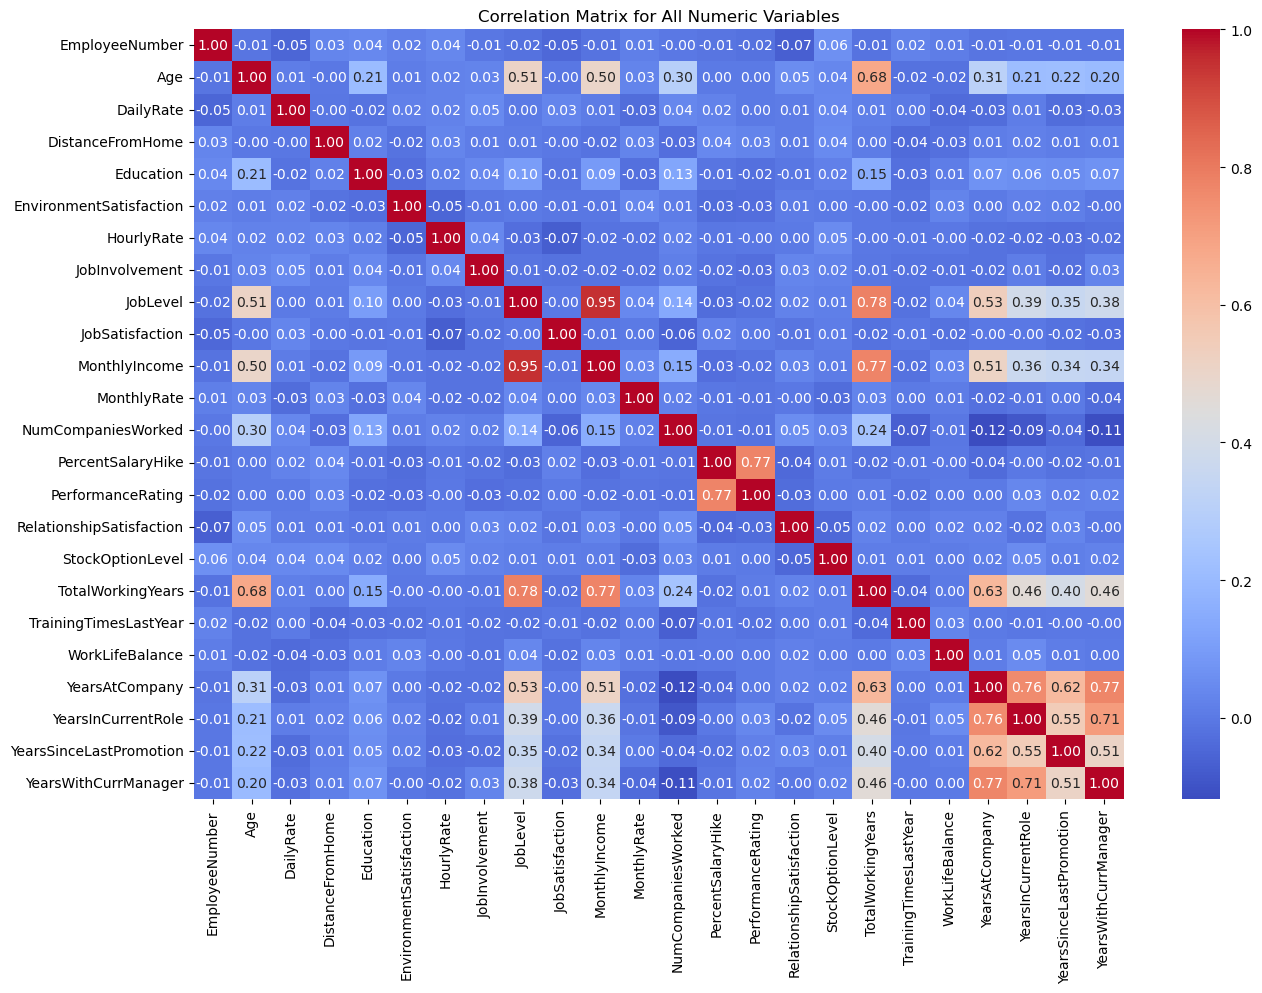

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation matrix for all numeric variables
numerical_cols = HR.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix_all = HR[numerical_cols].corr()

# Plotting the correlation matrix for all numeric variables
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_all, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for All Numeric Variables')
plt.show()



#### This heatmap visualizes the correlation coefficients between all numeric variables in the dataset.  Correlation values ranges from -1 to 1, where values closer to 1 or -1 indicate a strong positive or negative correlation, respectively, and values around 0 indicates no linear correlation.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic styles of the plots
sns.set(style='whitegrid')


Text(0.5, 1.0, 'Business Travel')

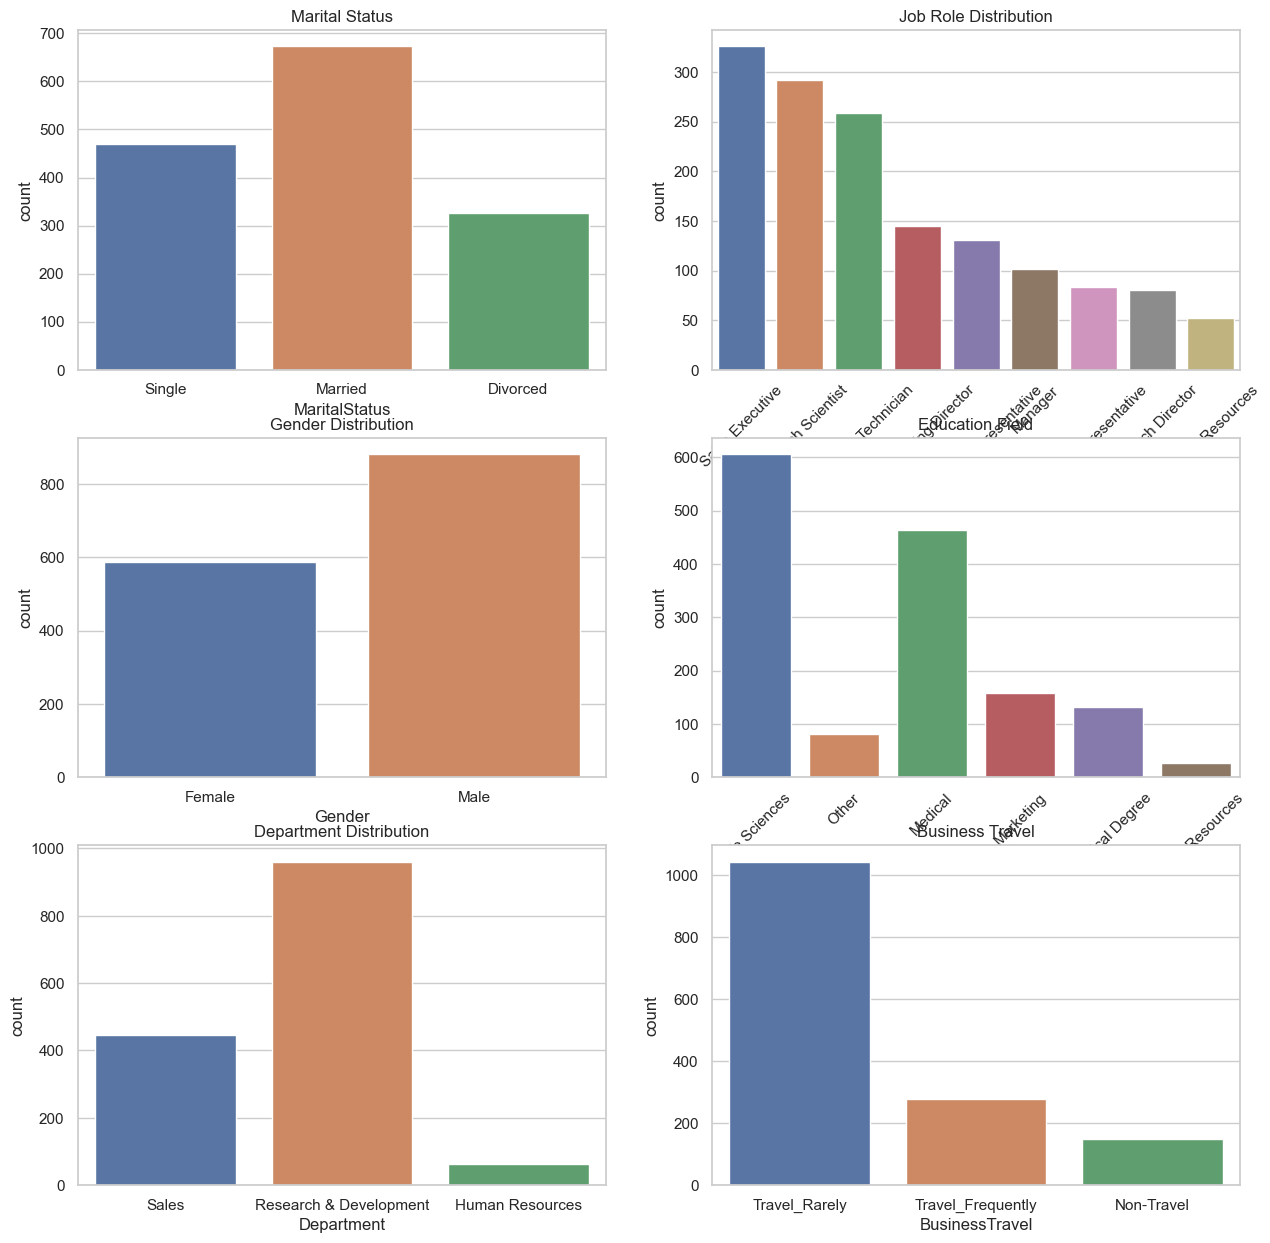

In [21]:
# Plotting categorical variables
sns.countplot(ax=axes[0, 0], data=HR, x='MaritalStatus').set_title('Marital Status')
sns.countplot(ax=axes[0, 1], data=HR, x='JobRole').set_title('Job Role Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[1, 0], data=HR, x='Gender').set_title('Gender Distribution')
sns.countplot(ax=axes[1, 1], data=HR, x='EducationField').set_title('Education Field')
axes[1, 1].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[2, 0], data=HR, x='Department').set_title('Department Distribution')
sns.countplot(ax=axes[2, 1], data=HR, x='BusinessTravel').set_title('Business Travel')

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plotting categorical variables
sns.countplot(ax=axes[0, 0], data=HR, x='MaritalStatus').set_title('Marital Status')
sns.countplot(ax=axes[0, 1], data=HR, x='JobRole').set_title('Job Role Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[1, 0], data=HR, x='Gender').set_title('Gender Distribution')
sns.countplot(ax=axes[1, 1], data=HR, x='EducationField').set_title('Education Field')
axes[1, 1].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[2, 0], data=HR, x='Department').set_title('Department Distribution')
sns.countplot(ax=axes[2, 1], data=HR, x='BusinessTravel').set_title('Business Travel')


### Distance from Home is not included in the subplots due to space, will be plotted 

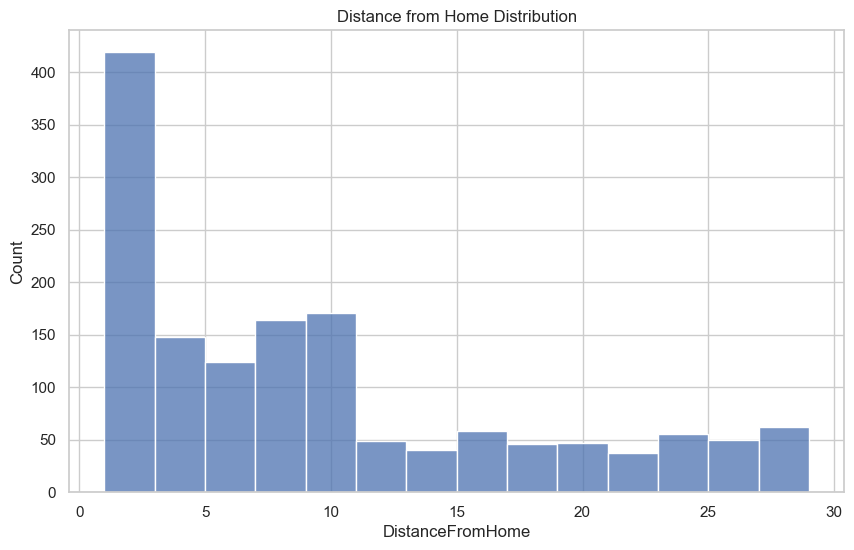

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=HR, x='DistanceFromHome').set_title('Distance from Home Distribution')
plt.show()

### The visualizations provide insights into various aspects of the dataset:

#### Marital Status, Job Role, Gender, Education Field, Department, and Business Travel: 

These plots show the distribution of employees across different categories. For example, the Job Role distribution indicates a variety of roles with varying frequencies and the Business Travel frequence plot shows how often employess travel for business. 

#### Relation between Overtime and Age: 

The scatter plot does not show a clear relationship between age and overtime, indicating that the decision to work overtime is likely influenced by factors other than age.

#### Total Working Years, Education Level, Number of Companies worked, and Distance from Home:

These histograms provide a distribution of employees based on their total working years, education level, the number of companies they have worked with, and their distance from home. For instance, the Total working Years distribution highlights how the workforce's experience levels are spread out.

The seperate plot for Distance from Home distribution shows how far employees live from their workplace which can be an important factor in understanding commuting challenges and their potential impact on work-life balance.

### Key Performance Metrics:

- Total Employees
- Retained Employees and their Percentage
- Attrition Employees and their Percentage
- Total Monthly Income
- Average Monthly Income



In [26]:
# Calculating Key Performance metrics

# Total Employees
total_employees = HR.shape[0]

# Retained Employees
retained_employees = HR[HR['Attrition'] == 'No'].shape[0]
retained_percentage = (retained_employees / total_employees) * 100

# Attrition Employees
attrition_employees = HR[HR['Attrition'] == 'Yes'].shape[0]
attrition_percentage = (attrition_employees / total_employess) * 100

# Total Monthly Income
total_monthly_income = HR['MonthlyIncome'].sum()

# Average Monthly Income
average_monthly_income = HR['MonthlyIncome'].mean()

# Displaying the results
print(f'Total Employees : {total_employees}')
print(f'Retained Employees : {retained_employees} ({retained_percentage:.2f}%)')
print(f'Retained Employees : {attrition_employees} ({retained_percentage:.2f}%)')
print(f'Total Monthly Employees : {total_monthly_income}')
print(f'Average Monthly Employees : {average_monthly_income:.2f}')




Total Employees : 1470
Retained Employees : 1233 (83.88%)
Retained Employees : 237 (83.88%)
Total Monthly Employees : 9559309
Average Monthly Employees : 6502.93


These metrics provide a comprehensive overview of the workforce composition, highlighting the balance between retained and attrition employees, highlighting the balance between retained and attrition employees, as well as financial aspects such as total and average monthly income.
This information is crucial for understanding the current state of employee satisfaction and financial health within the organization.

### Categories of Analysis

### 1. Demographic:

This report summarizes employee statistics, including age groups, gender, distance from home and marital statues, providing insights into workforce diversity and commuting patterns for informed decision making.

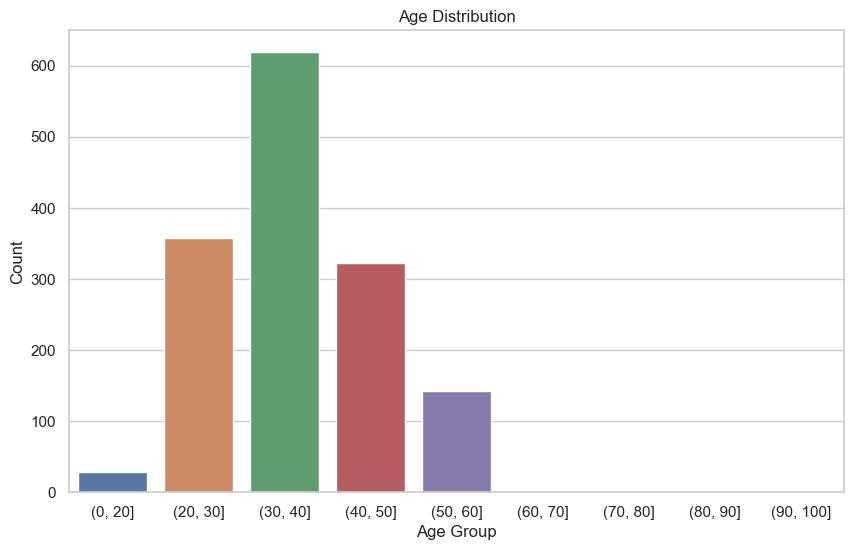

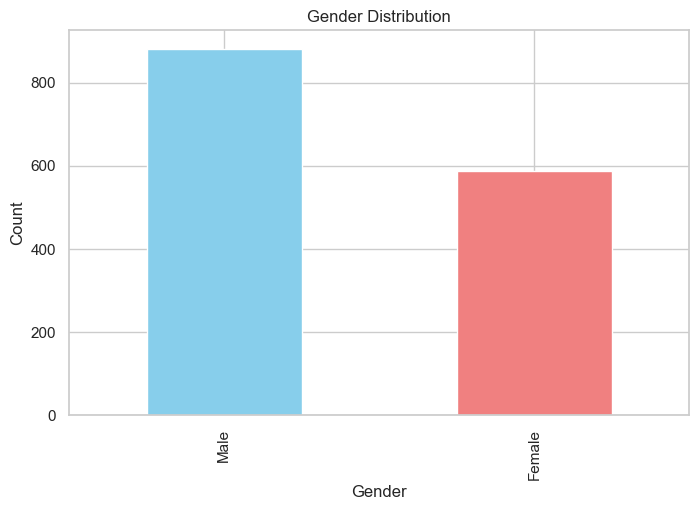

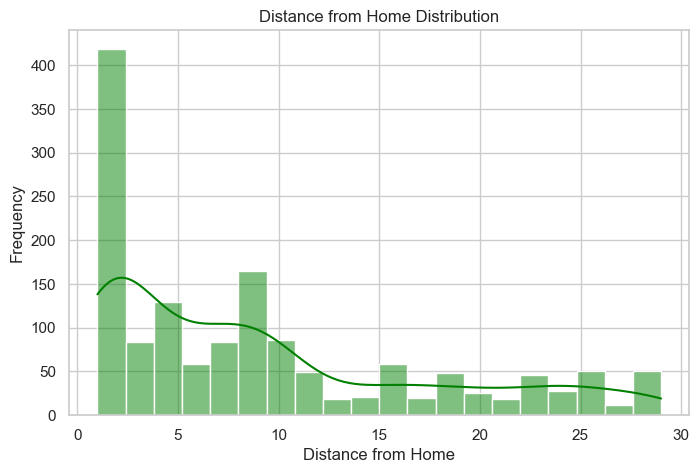

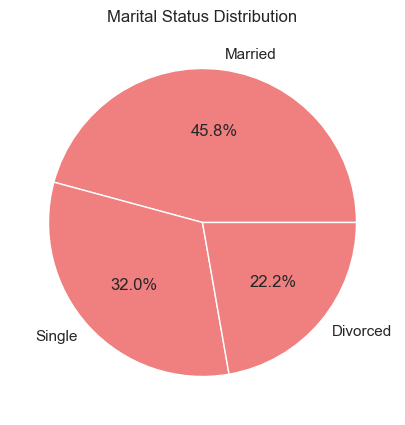

Demographic Analysis Completed.


In [30]:
# Age Groups
age_groups = pd.cut(HR['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100])
age_distribution = age_groups.value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values)
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Gender Distribution
gender_distribution = HR['Gender'].value_counts()
plt.figure(figsize=(8, 5))
gender_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Distance from Home Distribution
distance_distribution = HR['DistanceFromHome'].describe()
plt.figure(figsize=(8, 5))
sns.histplot(HR['DistanceFromHome'], bins=20, kde=True, color='green')
plt.title('Distance from Home Distribution')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.show()

# Marital Status Distribution
marital_status_distribution = HR['MaritalStatus'].value_counts()
plt.figure(figsize=(8, 5))
marital_status_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral'])
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()

print('Demographic Analysis Completed.')


In [31]:
age_distribution
gender_distribution
distance_distribution
marital_status_distribution

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

### 2. Employee Welfare:

This analysis consolidates data on attrition by relationship satisfaction, job satisfactoion, work life balance, job involvement, and job environment satisfaction.

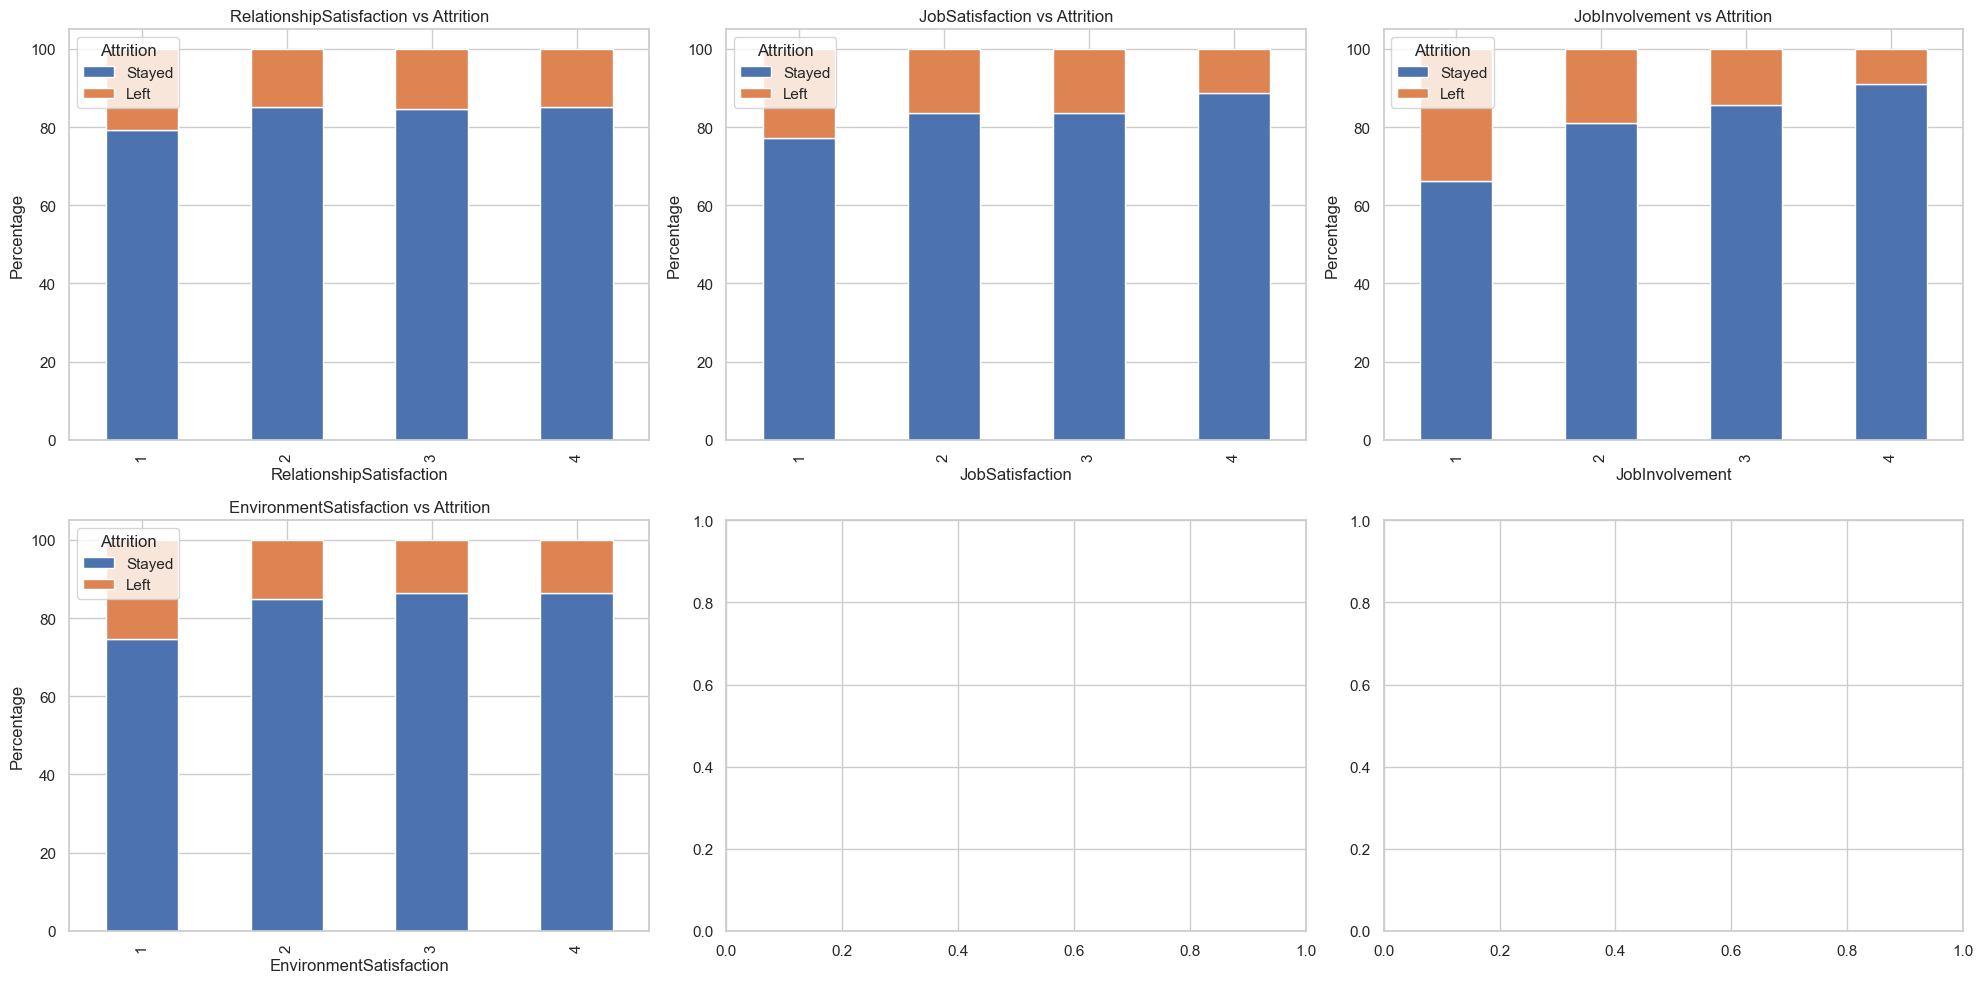

Employee welfare Analysis Completed


In [36]:
import matplotlib.pyplot as plt

# Selecting relevant columns for Employee Welfare analysis
columns_of_interest = ['Attrition', 'RelationshipSatisfaction', 'JobSatisfaction', 
                      'JobInvolvement', 'EnvironmentSatisfaction']

HR_welfare = HR[columns_of_interest]

# Calculating attrition rates for each category within the selected columns
attrition_rates = {}
for column in columns_of_interest[1:]:  # Skipping 'Attrition' column for iteration
    attrition_rates[column] = HR_welfare.groupby(column)['Attrition'].value_counts(normalize=True).unstack() * 100

# Visualizing the attrition rates for each category
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()
for i, (column, data) in enumerate(attrition_rates.items()):
    data.plot(kind='bar', stacked=True, ax=axs[i])
    axs[i].set_title(column + ' vs Attrition')
    axs[i].set_ylabel('Percentage')
    axs[i].set_xlabel(column)
    axs[i].legend(title='Attrition', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

print('Employee welfare Analysis Completed')
